# 1. Data Collection and Preparation

In the next steps, we import the necessary packages and load our datasets. We first start with the charging sessiong dataset.

In [348]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import math

### Charging Dataset Overview:

In [240]:
# import dataset
dfCharging = pd.read_csv("Data/charging_sessions.csv")
dfCharging.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [241]:
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [242]:
#remove the first "Unnamed" Column
dfCharging = dfCharging.drop('Unnamed: 0', axis=1)
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   timezone          66450 non-null  object 
 10  userID            49187 non-null  float64
 11  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.1+ MB


#### Remove duplicates

In [243]:
# test if there a duplicate rows
len(dfCharging)-len(dfCharging.drop_duplicates())

1413

In [244]:
# remove duplicate rows
dfCharging = dfCharging.drop_duplicates()

#### Check for missing values

In [245]:
print(dfCharging.isnull().sum())

id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
userInputs          17215
dtype: int64


We note that the columns , 'userID', 'userInputs' and 'doneChargingTime' have a considerable number of missing values.

#### Investigate "userId" and "userInputs"
First we check if the 'userID' matches the 'userInputs'

In [246]:
# Check whether the lines with missing 'userInputs' also have missing 'userID'
missing_userInputs = dfCharging['userInputs'].isnull()
missing_userID = dfCharging['userID'].isnull()

# Check that the missing values match
matching_missing = dfCharging[missing_userInputs & missing_userID]

# Output the number of matching lines
print(f'Number of lines with missing "userID" and "userIputs": {len(matching_missing)}')

# Calculate percentage of match
total_missing_userInputs = len(dfCharging[missing_userInputs])
if total_missing_userInputs > 0:
    matching_percentage = (len(matching_missing) / total_missing_userInputs) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')


Number of lines with missing "userID" and "userIputs": 17215
Percentage of compliance: 100.00%


But another important point could be to check out if the amount of missing data in these columns is significantly high

In [247]:
#Calculate total amount of observations recorded
total_observations_userID = len(dfCharging["userID"])
total_observations_userInputs = len(dfCharging["userInputs"])

#Calculate the amount of missing data
total_missing_userID = dfCharging["userID"].isnull().sum()
total_missing_userInputs = dfCharging["userInputs"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_userID = 100 * total_missing_userID / total_observations_userID
percentage_missing_userInputs = 100 * total_missing_userInputs / total_observations_userInputs

#Print the results
print("The percentage of missing data in userID:", percentage_missing_userID)
print("The percentage of missing data in userInputs:", percentage_missing_userInputs)



The percentage of missing data in userID: 26.469548103387304
The percentage of missing data in userInputs: 26.469548103387304


#### Investigate "doneChargingtime"

In [254]:
#Calculate total amount of observations recorded
total_observations_doneChargingTime = len(dfCharging["doneChargingTime"])

#Calculate the amount of missing data
total_missing_doneChargingTime = dfCharging["doneChargingTime"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_doneChargingTime = 100 * total_missing_doneChargingTime / total_observations_doneChargingTime

#Print the results
print("The percentage of missing data in doneChargingTime:", percentage_missing_doneChargingTime)

The percentage of missing data in doneChargingTime: 6.284115195965374


### Transformation of Features

#### Create separate columns for the features within "userInputs" to facilitate access

In [248]:
#methods for creation of "userInputs" columns

#transform 'userInputs' object to dictionary data type
def userInputStringToDictionary(entry):
    
    s = str(entry).replace("\'", "\"").replace("True", "1").replace("False","0")
    return json.loads(s)[0]

#return feature value from dictionary 'userInputs'
def returnUserInputFeature(entry, feature):
    
    return entry[feature]


In [249]:
#Transform 'userInputs' into dictionary type
dfCharging['userInputs'] = dfCharging[~dfCharging['userInputs'].isna()]['userInputs'].apply(userInputStringToDictionary)


#create a column for each "userInput" feature
userInput_features = ['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable', 
                      'modifiedAt', 'paymentRequired', 'requestedDeparture']

for feature in userInput_features:
    
    dfCharging[feature] = dfCharging[~dfCharging['userInputs'].isna()]['userInputs'].apply(returnUserInputFeature, feature=feature)
    
#drop column "userInputs"
dfCharging = dfCharging.drop('userInputs', axis=1)
                      

In [ ]:
#------- Check if needed !! -----------------


#cast of time variables
def transformDictionaryForTimeComparison(entry):
    
    entry['minutesAvailable'] = int(entry['minutesAvailable'])
    entry['modifiedAt'] = pd.to_datetime(entry['modifiedAt'], utc = True)
    entry['requestedDeparture'] = pd.to_datetime(entry['requestedDeparture'], utc = True)
    return entry

#checks if 'minutesAvailable' == 'requestedDeparture' - 'connectionTime' and sets true or false for new dictionary value 
#'minutesAvailableValid'
def calculateTimeDelta(entry):
    
    deltaUp = math.ceil((entry['requestedDeparture']-entry['connectionTime']).total_seconds() / 60)
    deltaDown = deltaUp - 1
    result = (deltaUp == entry['userInputs']['minutesAvailable']) or (deltaDown == entry['userInputs']['minutesAvailable'])
    entry['userInputs']['minutesAvailableValid'] = result
    return entry['userInputs']

#### Timestamp fetaures to data type timestamp

 All observations are within the same timezone:

In [196]:
print(dfCharging['timezone'].describe())

count                   65037
unique                      1
top       America/Los_Angeles
freq                    65037
Name: timezone, dtype: object


In [287]:
#get the timezone
timezone = dfCharging['timezone'].unique()[0]

# Convert to datetime and convert to the actual timezone
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'], utc=True).dt.tz_convert(timezone)
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'], utc=True).dt.tz_convert(timezone)
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'], utc=True).dt.tz_convert(timezone)
dfCharging['modifiedAt'] = pd.to_datetime(dfCharging['modifiedAt'], utc=True).dt.tz_convert(timezone)
dfCharging['requestedDeparture'] = pd.to_datetime(dfCharging['requestedDeparture'], utc=True).dt.tz_convert(timezone)

### Dealing with Missing Data

From the previous operations we see that almost a quarter of our data in these columns are missing. Therefore, we now have to decide how to deal with the missing data

- Do we remove the rows with the missing data?

- Do we keep the rows but ignore that these values are missing?

- Do we consider ways to impute the missing values?

#### Decision "userId" and "userInputs":

Since the missing values can't be calculated or derived from the other features, we have to decide if we remove features/observations with missing features or if we keep them. Later, we will perform different types of analyses which will focus on different features. Hence, we can't make a general decision now and postpone the decision to the single analyses tasks. If the "userInputs" will be required, we will remove observations that do not have them, if the "userInputs" are not required, we will just remove the respective features and keep all observations.

Thus, we can maximizie our available data. 

#### Decision "doneChargingTime":

Another column with a lot of missing data is the "doneChargingTime" column.

First we will check if doneChargingTime can be derived from other features.

'doneChargingTime' is defined as: Time when of the last non-zero current draw recorded.
What happens if a user request of kWh is not fullfilled, will the charging process continue until the car disconnects?

In [266]:
#
nrSamplesNanDoneChargingTime = dfCharging[dfCharging['doneChargingTime'].isna()].shape[0]
nrSamplesNanDoneChargingTimeButWithUserInputs = dfCharging[(dfCharging['doneChargingTime'].isna()) & (dfCharging['userID'].notnull())].shape[0]
nrSamplesNanDoneChargingTimeAndNotDeliveredKwh = dfCharging[(dfCharging['doneChargingTime'].isna()) & (dfCharging['kWhRequested'] > dfCharging['kWhDelivered'])].shape[0]

print(str(nrSamplesNanDoneChargingTimeButWithUserInputs/nrSamplesNanDoneChargingTime) + "% of the samples where doneChargingTime is missing have userInputs")

print(str(nrSamplesNanDoneChargingTimeAndNotDeliveredKwh/nrSamplesNanDoneChargingTime) + '% of the samples where doneChargingTime is missing have not fullfiled the kWh request')


0.7775874724736971% of the samples where doneChargingTime is missing have userInputs
0.705162711034989% of the samples where doneChargingTime is missing have not fullfiled the kWh request


If it means that when the kWh request was not fullfiled, the doneChargingTime is just the disconnectTime, then we could fill 71% of the missing doneChargingTime values.

So lets have a look at the samples with doneChargingTime and not fullfiled kWh Request. Is it true that doneChargingTime == disconnectTime?


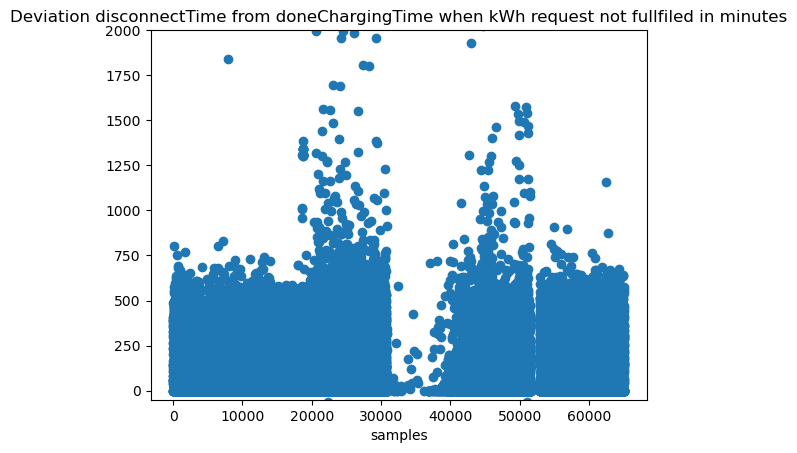

In [279]:
def calcDiffDisconnectAndDoneCharging(entry):
    
    return (entry['disconnectTime']-entry['doneChargingTime']).total_seconds()/60


samplesNanDoneChargingTimeAndNotDeliveredKwh = dfCharging[(dfCharging['doneChargingTime'].notnull()) & (dfCharging['kWhRequested'] > dfCharging['kWhDelivered'])].copy()
samplesNanDoneChargingTimeAndNotDeliveredKwh['deviationDisconnect'] = samplesNanDoneChargingTimeAndNotDeliveredKwh.apply(lambda row: calcDiffDisconnectAndDoneCharging(row), axis=1)

#plot the deviation
plt.scatter(samplesNanDoneChargingTimeAndNotDeliveredKwh.index, samplesNanDoneChargingTimeAndNotDeliveredKwh['deviationDisconnect'], marker='o', linestyle='-')
plt.ylim(bottom=-50, top=2000)
plt.xlabel('samples')
plt.title('Deviation disconnectTime from doneChargingTime when kWh request not fullfiled in minutes')
plt.show()

We see that there exist huge deviations between disconnectTime and doneChargingTime when kWh request is not fullfiled. So we cant just set the missing values to be the disconnectTime where kWh request is not fullfiled.
Probably the utilization of the stations and other factors influence the doneChargingTime

Which also raises questions as to why, in cases with a deviation of more than e.g. 10 hours, the kWh request was not fullfilled


Can we just use 'minutesAvailable' and 'requestedkWh' to estimate 'doneChargingTime'?

Is the rate of the delivered kWh just stretched to the expected time of availability? Lets look at samples with 'doneChargingTime' and fullfilled kWhRequest. Does the 'doneChargingTime' equal 'requestedDeparture'?


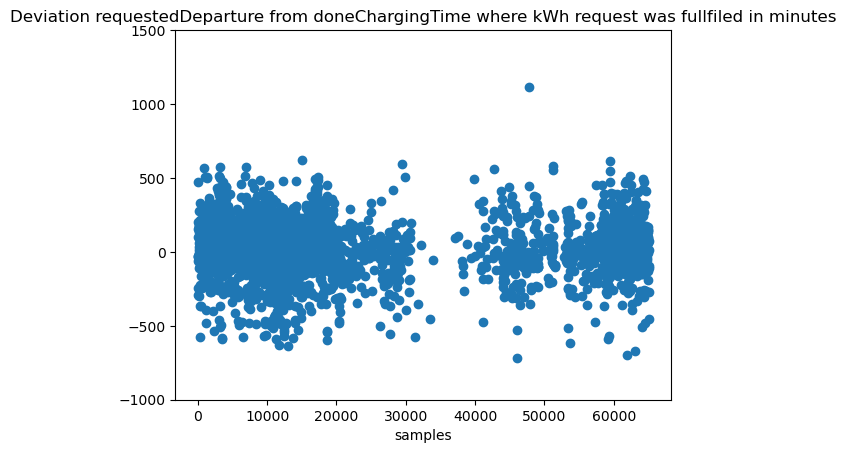

In [286]:
def calcDiffDepartAndDoneCharging(entry):
    
    return (entry['requestedDeparture']-entry['doneChargingTime']).total_seconds()/60


dfDeliveredKwh = dfCharging[(dfCharging['doneChargingTime'].notnull()) & (dfCharging['kWhRequested'] <= dfCharging['kWhDelivered'])].copy()
dfCalc = dfDeliveredKwh.apply(lambda row: calcDiffDepartAndDoneCharging(row), axis=1)

#plot the deviation
plt.scatter(dfDeliveredKwh.index, dfCalc, marker='o', linestyle='-')
plt.ylim(bottom=-1000, top=1500)  
plt.xlabel('samples')
plt.title('Deviation requestedDeparture from doneChargingTime where kWh request was fullfiled in minutes')
plt.show()

Positive values mean that the 'doneChargingTime' was before the originally requested departure time. Negative values mean that the actual departure was later than requested originally and the 'doneChargingTime' was also after the originally requested departure time.\

Too many significant deviations from 'requestedDeparture' and 'doneChargingTime'.

The results strongly suggests that you have to look very closely at the utilisation of the stations here. But there could also be another logic behind the charging scheduling which is not deducible from the given dataset.

##### Since "only" 6% of the samples are missing doneChargingTime, and we would need to make assumptions that we are not sure about to further investigate this matter, and we dont know how important this feature will be for our further work at this moment, we just leave it like it is. Later we can consider if we drop the samples with missing values or drop the feature itself or make further investigations.

#### Decision Weather Dataset

In [288]:
#Load the weather data from burbank airport
dfWeather = pd.read_csv("Data/weather_burbank_airport.csv")
dfWeather.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [289]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [290]:
# test if there a duplicate rows
len(dfWeather)-len(dfWeather.drop_duplicates())

0

No duplicates existent

In [291]:
# Check for missing values
print(dfWeather.isnull().sum())

city                        0
timestamp                   0
temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
precipitation               0
felt_temperature           26
dtype: int64


The columns , ‘temperature’, ‘cloud_cover’, 'cloud_cover_description', 'pressure', 'windspeed' and ‘felt_temperature’ have a number of missing values.

First we check if missing 'cloud_cover' also has missing 'cloud_cover_description'

In [295]:
# Check whether the lines with missing 'cloud_cover' also have missing 'cloud_cover_description'
missing_cloud_cover = dfWeather['cloud_cover'].isnull()
missing_cloud_cover_description = dfWeather['cloud_cover_description'].isnull()

# Check that the missing values match
matching_missing = dfWeather[missing_cloud_cover & missing_cloud_cover_description]

# Output the number of matching lines
print(f'Number of lines with missing "cloud_cover" and "cloud_cover_description": {len(matching_missing)}')

# Calculate percentage of match
total_missing_cloud_cover = len(dfWeather[missing_cloud_cover])
if total_missing_cloud_cover > 0:
    matching_percentage = (len(matching_missing) / total_missing_cloud_cover) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')

Number of lines with missing "cloud_cover" and "cloud_cover_description": 20
Percentage of compliance: 100.00%


At this point we could again check if the amount of missing data is significantly high

In [107]:
#Calculate total amount of observations recorded
total_observations_cloud_cover = len(dfWeather["cloud_cover"])
total_observations_cloud_cover_description = len(dfWeather["cloud_cover_description"])

#Calculate the amount of missing data
total_missing_cloud_cover = dfWeather["cloud_cover"].isnull().sum()
total_missing_cloud_cover_description = dfWeather["cloud_cover_description"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_cloud_cover = 100 * total_missing_cloud_cover / total_observations_cloud_cover
percentage_missing_cloud_cover_description = 100 * total_missing_cloud_cover_description / total_observations_cloud_cover_description

#Print the results
print("The percentage of missing data in cloud_cover:", percentage_missing_cloud_cover)
print("The percentage of missing data in cloud_cover_description:", percentage_missing_cloud_cover_description)



The percentage of missing data in cloud_cover: 0.0683900971139379
The percentage of missing data in cloud_cover_description: 0.0683900971139379


We see that only 0,068% of our data is missing. We now could check the other columns with missing values to see how much of our data is missing there. We build a a for loop to do this faster. 

In [108]:
# List of columns to check for missing values
columns_to_check = ["temperature", "pressure", "windspeed", "felt_temperature"] 

for column in columns_to_check:
    total_observations = len(dfWeather[column])
    total_missing = dfWeather[column].isnull().sum()
    percentage_missing = 100 * total_missing / total_observations
    print(f"Percentage of missing values in {column}: {percentage_missing:.2f}%")


Percentage of missing values in temperature: 0.09%
Percentage of missing values in pressure: 0.03%
Percentage of missing values in windspeed: 0.29%
Percentage of missing values in felt_temperature: 0.09%


For **weather data** we decide apply to mean imputation for the following columns:

- temperature
- cloud cover
- pressure
- windspeed
- felt temperature

In [296]:
# Sort the DataFrame by timestamp
dfWeather.sort_values(by='timestamp', inplace=True)

# Function to impute missing values using the mean of neighboring values
def impute_missing_values(column, window_size=5):
    # Calculate the mean using a rolling window
    # We have to use a window for the cases where some neighboring values are also missing.
    return column.fillna(column.rolling(window=window_size, min_periods=1).mean())

# Apply the imputation function to the specified columns
columns_to_impute = ['temperature', 'cloud_cover', 'windspeed', 'pressure',"felt_temperature"]

for column in columns_to_impute:
    dfWeather[column] = impute_missing_values(dfWeather[column])

# Verify the changes
print(dfWeather.isnull().sum())



city                        0
timestamp                   0
temperature                 0
cloud_cover                 0
cloud_cover_description    20
pressure                    0
windspeed                   0
precipitation               0
felt_temperature            0
dtype: int64


In [297]:
def fill_missing_cloud_cover_description(dfWeather):
    dfWeather = dfWeather.sort_values(by='timestamp')  # Actually not needed because of the previous function

    for index, row in dfWeather.iterrows():
        if pd.isnull(row['cloud_cover_description']):
            # Round the 'cloud_cover' value
            rounded_cloud_cover = round(row['cloud_cover'])

            # Try to find a match with the rounded 'cloud_cover'
            matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover) & (~pd.isnull(dfWeather['cloud_cover_description']))]

            if not matching_rows.empty:
                matching_description = matching_rows['cloud_cover_description'].values[0]
                dfWeather.at[index, 'cloud_cover_description'] = matching_description
            else:
                # If no match is found, try to find a match for 'rounded_cloud_cover + 1'
                next_matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover + 1) & (~pd.isnull(dfWeather['cloud_cover_description']))]

                if not next_matching_rows.empty:
                    next_matching_description = next_matching_rows['cloud_cover_description'].values[0]
                    dfWeather.at[index, 'cloud_cover_description'] = next_matching_description

    return dfWeather

dfWeather = fill_missing_cloud_cover_description(dfWeather)

# Verify the changes
print(dfWeather.isnull().sum())


city                       0
timestamp                  0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
dtype: int64


### Next Steps


- Merge charging and weather data
- Look for the amount missing values in weather data after merging
- Check if there are other weather data available somewhere else
- (Maybe) separate charging data depending on sideID and check for doneCharging/disconnectTime differences

### Merging the two DataFrames

In [303]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29244 non-null  float64
 3   cloud_cover              29244 non-null  float64
 4   cloud_cover_description  29244 non-null  object 
 5   pressure                 29244 non-null  float64
 6   windspeed                29244 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29244 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.2+ MB


Check the distribution of the temperature values to find out, if the timestamps are in UTC as well and need to be converted to the right timezone:

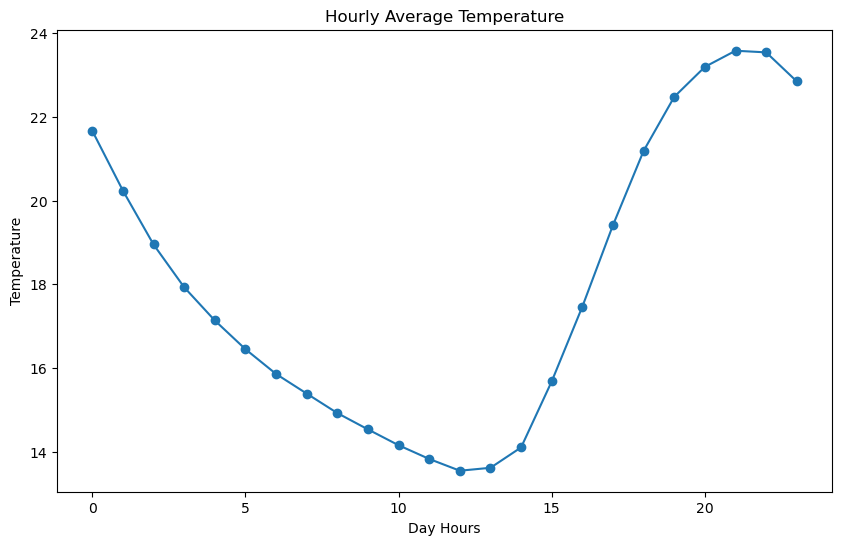

In [315]:
# Convert the type object to datetime
dfWeather["timestamp"] = pd.to_datetime(dfWeather["timestamp"], utc=True)

hourly_avg_temp = []

for i in range(0,24):
    
    hourly_avg_temp.append(dfWeather[dfWeather["timestamp"].dt.hour == i]['temperature'].mean())
    

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_temp, marker='o')
plt.xlabel('Day Hours')
plt.ylabel('Temperature')
plt.title('Hourly Average Temperature')
plt.show()

Since the lowest average temperature is reached at noon and the highest at 9pm, it must be converted to the right timezone:

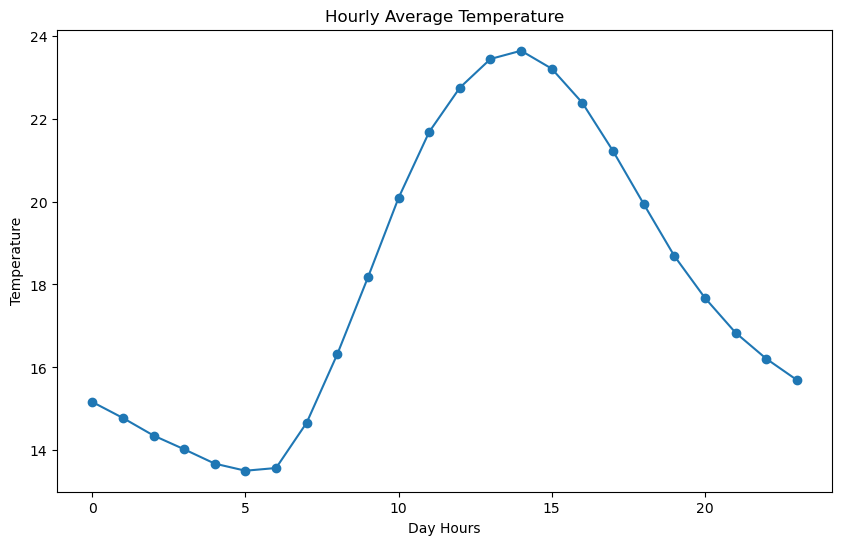

In [317]:
#get the timezone
timezone = dfCharging['timezone'].unique()[0]

# Convert to datetime and convert to the actual timezone
dfWeather["timestamp"] = dfWeather["timestamp"].dt.tz_convert(timezone)

#Check again the distribution
hourly_avg_temp = []

for i in range(0,24):
    
    hourly_avg_temp.append(dfWeather[dfWeather["timestamp"].dt.hour == i]['temperature'].mean())
    

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_temp, marker='o')

# Add labels and title
plt.xlabel('Day Hours')
plt.ylabel('Temperature')
plt.title('Hourly Average Temperature')
plt.show()

**Now the distribution seems reasonable.**

In [319]:
# Sort values for merge_asof to work
dfCharging.sort_values('connectionTime', inplace=True)
dfWeather.sort_values('timestamp', inplace=True)

# Merge the two datasets according to their timestamps. 
# Use merge_asof to merge according to the nearest timestamp found in dfWeather with a tolerance of 5 hours
dfMerged = pd.merge_asof(dfCharging, dfWeather, left_on = "connectionTime", right_on = "timestamp", tolerance = pd.Timedelta(hours=5))
    

In [320]:
dfMerged.isnull().sum()

id                             0
connectionTime                 0
disconnectTime                 0
doneChargingTime            4087
kWhDelivered                   0
sessionID                      0
siteID                         0
spaceID                        0
stationID                      0
timezone                       0
userID                     17215
WhPerMile                  17215
kWhRequested               17215
milesRequested             17215
minutesAvailable           17215
modifiedAt                 17215
paymentRequired            17215
requestedDeparture         17215
city                        9013
timestamp                   9013
temperature                 9013
cloud_cover                 9013
cloud_cover_description     9013
pressure                    9013
windspeed                   9013
precipitation               9013
felt_temperature            9013
dtype: int64

**We are missing weather data for 9013 observations in the charging data.**

Since we couldn't find additional data from further resources, we accept this situation. \

**Here too, a decision must be made on a case-by-case basis as to whether the weather data or the observations without weather data are dispensed with.**

# 2. Descriptive Analytics

### a) Temporal Patterns and Seasonality:

##### Investigate seasonal patterns:

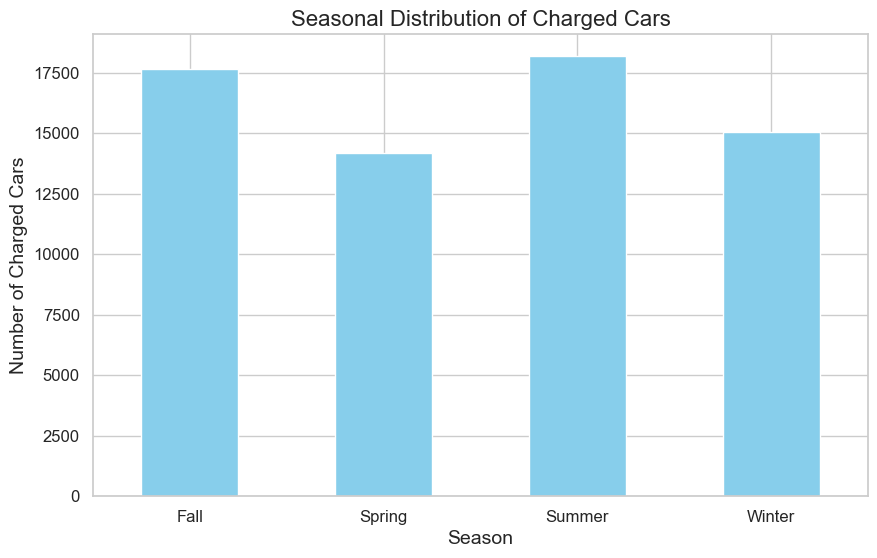

In [372]:
# Create a new column for the season based on the month
dfCharging['season'] = dfCharging['connectionTime'].dt.month.map(
    {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
     7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Group by season and count the number of charged cars in each season
seasonal_counts = dfCharging.groupby('season').size()

# Set the style using seaborn
sns.set(style="whitegrid")

# Plot the results with improved styling
plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind='bar', color='skyblue')
plt.title('Seasonal Distribution of Charged Cars', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Charged Cars', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From this chart we see that the seasons with the highest demand are summer and fall.

Observation: The drop in spring could be due to the spring break in the universities.

It could also be interesting to know the average temperatures of every season to understand what kind of a climate our city has.


In [375]:
# Create a new column for the season based on the month
dfWeather['season'] = dfWeather['timestamp'].dt.month.map(
    {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
     7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Group by season and calculate the average temperature for each season
average_temperature_by_season = dfWeather.groupby('season')['temperature'].mean()

# Create a pivot table to calculate the average temperature for each season
pivot_table = pd.pivot_table(dfWeather, values='temperature', index='season', aggfunc='mean')

# Display the pivot table
print(pivot_table)

        temperature
season             
Fall      19.825194
Spring    16.074278
Summer    22.730034
Winter    13.116715


From these results we see that our city has a very mild climate, which could explain the absense of big seasonal fluctations in demand.

##### Investigate weekly patterns:

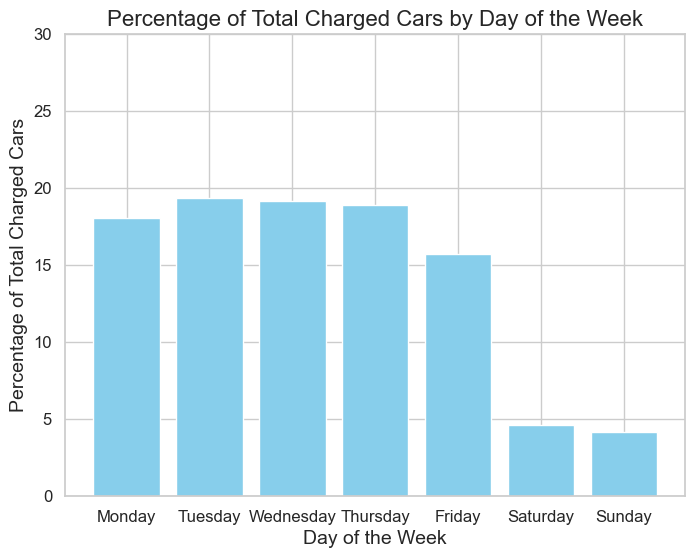

In [374]:
# Create a new column for the day of the week (Monday=0, Sunday=6)
dfCharging['day_of_week'] = dfCharging['connectionTime'].dt.dayofweek

# Count the number of occurrences for each day of the week
counts_by_day = dfCharging['day_of_week'].value_counts()

# Calculate the percentage of total demand for each day of the week
percentage_demand_by_day = (counts_by_day / counts_by_day.sum()) * 100

# Plot the results with a bar chart
plt.figure(figsize=(8, 6))
plt.bar(percentage_demand_by_day.index, percentage_demand_by_day, color='skyblue')

plt.title('Percentage of Total Charged Cars by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Percentage of Total Charged Cars', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 30)  # Set the y-axis limit to ensure it starts from 0
plt.show()

From this chart we can identify that the demand level on the weekdays is high and stays high until the weekends. In the weekends the demand is quite low.


##### Investigate daily patterns:

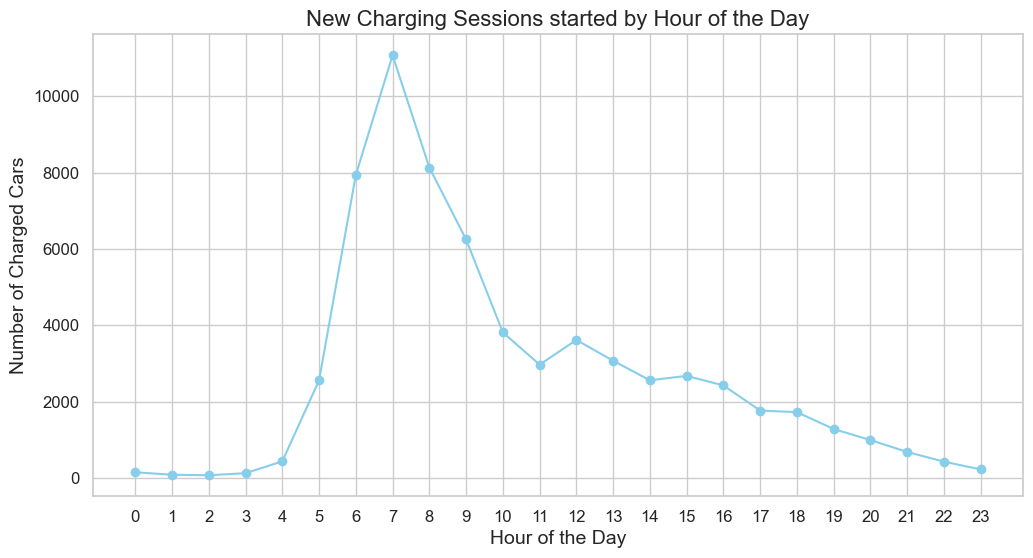

In [386]:
# Create a new column for the hour of the day
dfCharging['hour_of_day'] = dfCharging['connectionTime'].dt.hour 
# Count the number of occurrences for each hour of the day
counts_by_hour = dfCharging['hour_of_day'].value_counts().sort_index()

# Plot the results with a line chart
plt.figure(figsize=(12, 6))
plt.plot(counts_by_hour.index, counts_by_hour, marker='o', linestyle='-', color='skyblue')

plt.title('New Charging Sessions started by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Charged Cars', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# !!Explain!!

### b) Key Performance Indicators (KPIs):

We decicded for the KPIs:
- Absolute utilization: Nr. of currently connected vehiclesAverage kWh requested per user.
- Average kWh requested per user in the last hour (only available from users with "userInputs" .
- Currently parking but not charging.

In [327]:
#get the respective features
dfKPIs = dfCharging[['connectionTime','disconnectTime', 'doneChargingTime', 'siteID', 'kWhRequested']].copy()

def createConnectionTimeLastHour(row):
    
    return row.replace(second=0, minute=0)+pd.DateOffset(hours=1)
    

dfKPIs['connectionTimeHourBefore'] = dfKPIs['connectionTime'].apply(createConnectionTimeLastHour)

Create a dataframe with hourly entries over the time period that is covered by our charging data and calculate the hourly KPI values:

In [351]:
#get the boundaries of the mentioned time period
startTimestamp = min(dfKPIs['connectionTime'].min(),dfKPIs['disconnectTime'].min()).replace(microsecond=0, second=0, minute=0)
endTimestamp = max(dfKPIs['connectionTime'].max(),dfKPIs['disconnectTime'].max()).replace(microsecond=0, second=0, minute=0) + pd.DateOffset(hours=1)

#create the hourly dataframe
dfHourly = pd.DataFrame({'hours': pd.date_range(startTimestamp, endTimestamp, freq='1H')})

#add cloumns for the 3 KPIs:
    #1. Absolute utilization
    #2. Average kWh requested per user
    #3. Currently parking but not charging
dfHourly['absUtilization1'] = 0
dfHourly['absUtilization2'] = 0
dfHourly['avg_kWhRequested1'] = 0
dfHourly['avg_kWhRequested2'] = 0
dfHourly['absBlocking1'] = 0
dfHourly['absBlocking2'] = 0


In [352]:
#calculate the hourly KPIs
for index, row in dfHourly.iterrows():
    
    dfHourly.at[index, 'absUtilization1'] = dfKPIs[(dfKPIs['siteID'] == 1) & 
                                                 (dfKPIs['connectionTime'] <= row['hours']) & 
                                                 (dfKPIs['disconnectTime'] >= row['hours'])].shape[0]
    dfHourly.at[index, 'absUtilization2'] = dfKPIs[(dfKPIs['siteID'] == 2) & 
                                                 (dfKPIs['connectionTime'] <= row['hours']) & 
                                                 (dfKPIs['disconnectTime'] >= row['hours'])].shape[0]
    dfHourly.at[index, 'avg_kWhRequested1'] = dfKPIs[(dfKPIs['kWhRequested'].notnull()) &
                                                  (dfKPIs['siteID'] == 1) &
                                                 (dfKPIs['connectionTimeHourBefore'] == row['hours'])]['kWhRequested'].mean()
    dfHourly.at[index, 'avg_kWhRequested2'] = dfKPIs[(dfKPIs['kWhRequested'].notnull()) &
                                                  (dfKPIs['siteID'] == 2) &
                                                 (dfKPIs['connectionTimeHourBefore'] == row['hours'])]['kWhRequested'].mean()
    dfHourly.at[index, 'absBlocking1'] = dfKPIs[(dfKPIs['doneChargingTime'].notnull()) & 
                                                    (dfKPIs['siteID'] == 1) & 
                                                 (dfKPIs['doneChargingTime'] <= row['hours']) & 
                                                 (dfKPIs['disconnectTime'] >= row['hours'])].shape[0]
    dfHourly.at[index, 'absBlocking2'] = dfKPIs[(dfKPIs['doneChargingTime'].notnull()) & 
                                                    (dfKPIs['siteID'] == 2) & 
                                                 (dfKPIs['doneChargingTime'] <= row['hours']) & 
                                                 (dfKPIs['disconnectTime'] >= row['hours'])].shape[0]


In [365]:
# fill Nan in kWhRequeste with 0 to have meaningful results
dfHourly.loc[dfHourly['avg_kWhRequested1'].isnull(),'avg_kWhRequested1'] = 0
dfHourly.loc[dfHourly['avg_kWhRequested2'].isnull(),'avg_kWhRequested2'] = 0

Plotting preparation - Calculate the average KPI values per hour of the day over the whole time period covered by the charging data:

In [366]:
#init dataframe with one entry for every hour of the day and add respective KPI columns
dfPlotKPI = pd.DataFrame({'hours': range(24)})
dfPlotKPI['avgUtilization1'] = 0
dfPlotKPI['avgUtilization2'] = 0
dfPlotKPI['avg_kWhRequestedPerUser1'] = 0
dfPlotKPI['avg_kWhRequestedPerUser2'] = 0
dfPlotKPI['avgBlocking1'] = 0
dfPlotKPI['avgBlocking2'] = 0

In [367]:
#calculate the average KPI values
for index, row in dfPlotKPI.iterrows():
    
    dfPlotKPI.at[index,'avgUtilization1'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['absUtilization1'].mean()
    dfPlotKPI.at[index,'avgUtilization2'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['absUtilization2'].mean()
    dfPlotKPI.at[index,'avg_kWhRequestedPerUser1'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['avg_kWhRequested1'].mean()
    dfPlotKPI.at[index,'avg_kWhRequestedPerUser2'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['avg_kWhRequested2'].mean()
    dfPlotKPI.at[index,'avgBlocking1'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['absBlocking1'].mean()
    dfPlotKPI.at[index,'avgBlocking2'] = dfHourly[dfHourly['hours'].dt.hour == row['hours']]['absBlocking2'].mean()
    

#### Plotting of the hourly KPI values, averaged over the whole time period covered by the charging data 

In [368]:
def plot_avg_hourly_kpi(hours, featureSite1, label1, featureSite2, label2, title, yLabel):
    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(hours, featureSite1, label=label1, marker='o')
    plt.plot(hours, featureSite2, label=label2, marker='o')
    plt.xlabel('Hours')
    plt.ylabel(yLabel)
    plt.title(title)
    plt.legend()
    #plt.savefig(title+'.png')
    plt.show()

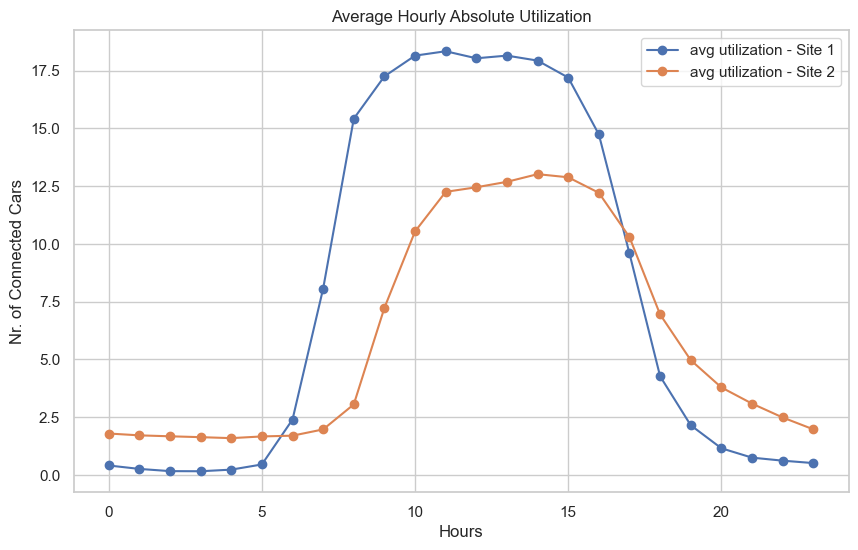

In [369]:
plot_avg_hourly_kpi(dfPlotKPI['hours'], dfPlotKPI['avgUtilization1'], 'avg utilization - Site 1', dfPlotKPI['avgUtilization2'], 'avg utilization - Site 2', 'Average Hourly Absolute Utilization', 'Nr. of Connected Cars')


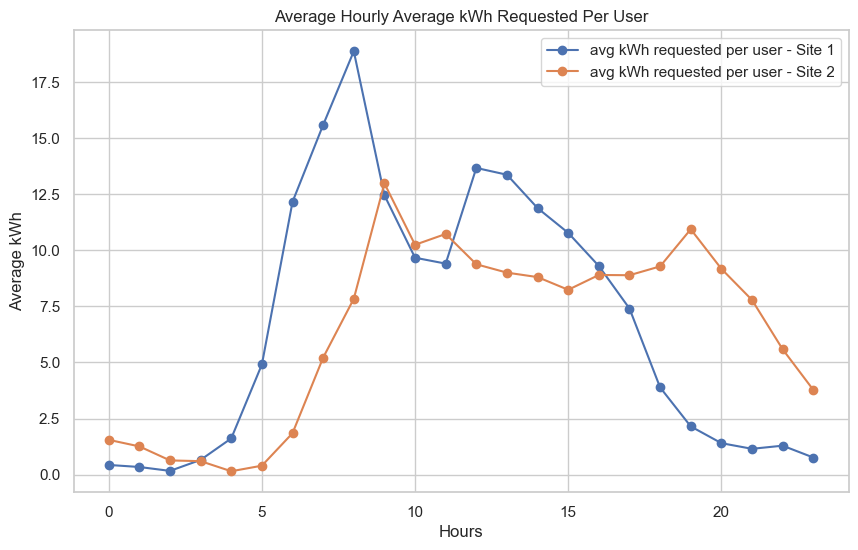

In [370]:
plot_avg_hourly_kpi(dfPlotKPI['hours'], dfPlotKPI['avg_kWhRequestedPerUser1'], 'avg kWh requested per user - Site 1', dfPlotKPI['avg_kWhRequestedPerUser2'], 'avg kWh requested per user - Site 2', 'Average Hourly Average kWh Requested Per User', 'Average kWh')


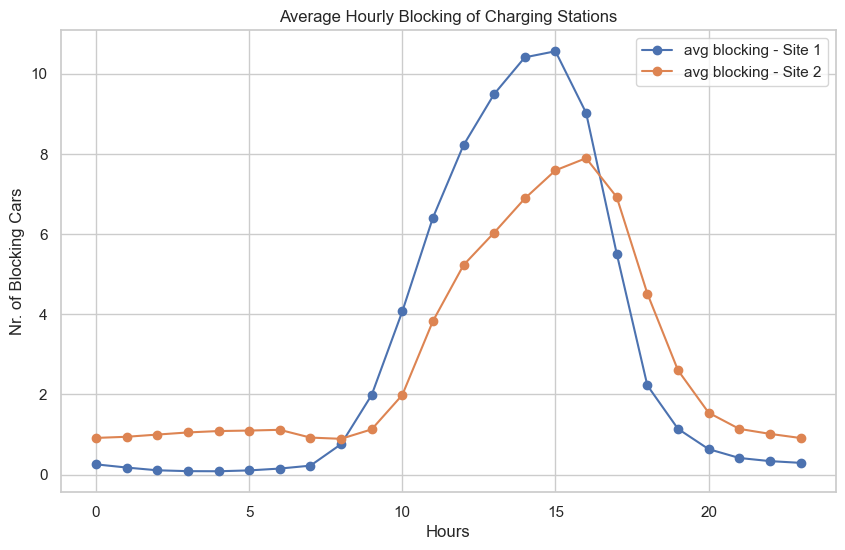

In [371]:
plot_avg_hourly_kpi(dfPlotKPI['hours'], dfPlotKPI['avgBlocking1'], 'avg blocking - Site 1', dfPlotKPI['avgBlocking2'], 'avg blocking - Site 2', 'Average Hourly Blocking of Charging Stations', 'Nr. of Blocking Cars')


### c) Site Characteristics:

Check the number of charging sessions per day belonging to each site.

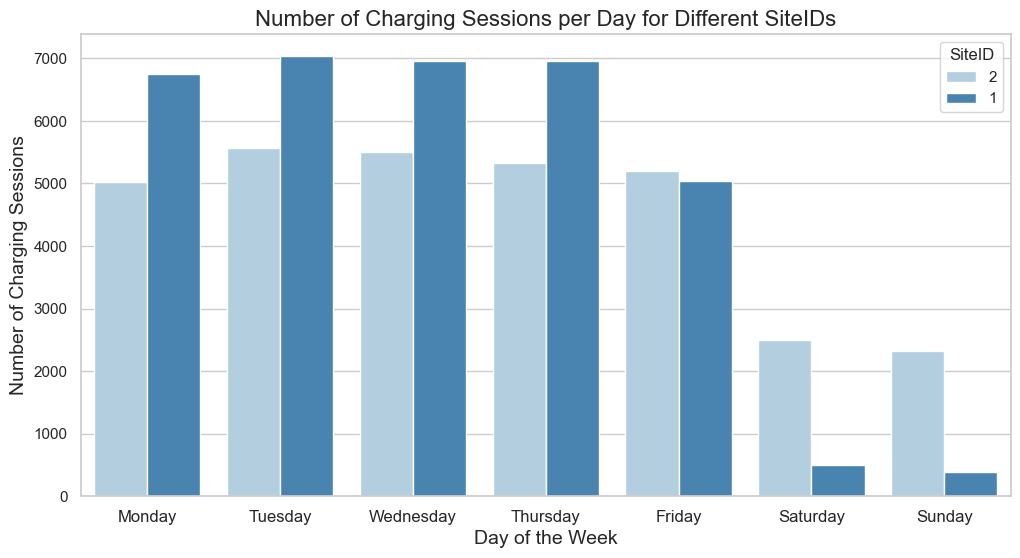

In [389]:
dfCharging['siteID'] = dfCharging['siteID'].astype('str')
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='siteID', data=dfCharging, palette="Blues")
plt.title('Number of Charging Sessions per Day for Different SiteIDs', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=12)
plt.ylabel('Number of Charging Sessions', fontsize=14)
plt.legend(title='SiteID')
plt.show()

Interestingly, even though site 1 is used more often in general, site 2 has a much higher demand on the weekends.

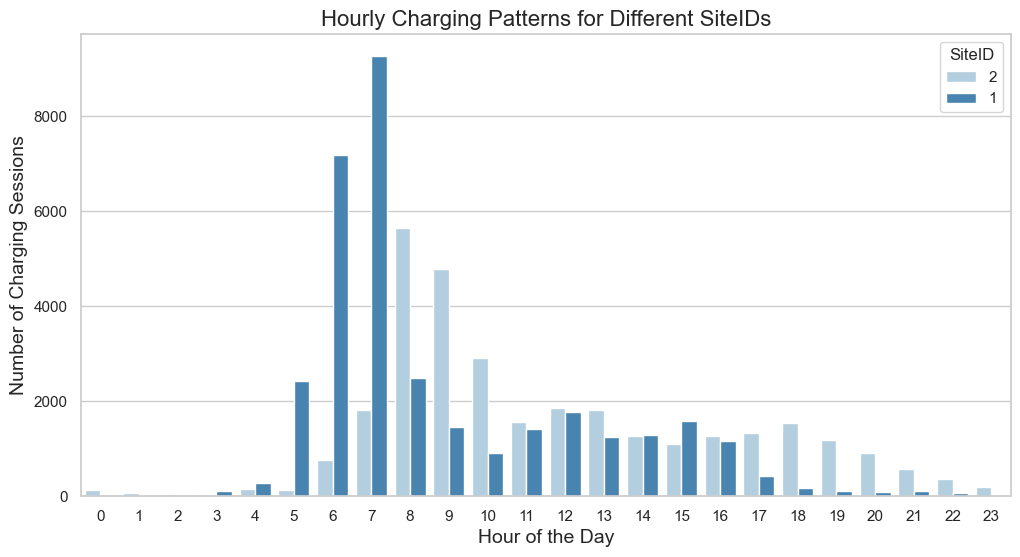

In [387]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', hue='siteID', data=dfCharging, palette="Blues")
plt.title('Hourly Charging Patterns for Different SiteIDs', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Charging Sessions', fontsize=14)
plt.legend(title='SiteID')
plt.show()

Another important point could be to check for the number of registered/unregistered users at each site.

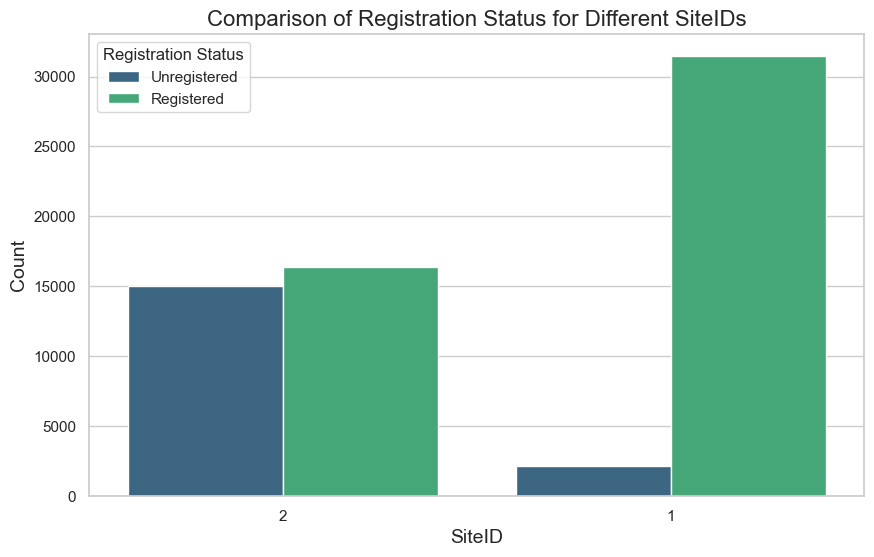

In [391]:
# Create a new column indicating registration status
dfCharging['registration_status'] = dfCharging['userID'].notnull().map({True: 'Registered', False: 'Unregistered'})

plt.figure(figsize=(10, 6))
sns.countplot(x='siteID', hue='registration_status', data=dfCharging, palette='viridis')
plt.title('Comparison of Registration Status for Different SiteIDs', fontsize=16)
plt.xlabel('SiteID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Registration Status')
plt.show()

In site 1 there a mainly registered users.

Lets look at the average chargins session duration per site:

In [393]:
dfCharging['siteID'] = dfCharging['siteID'].astype('int')
# Calculate the duration for each charging session
dfCharging['sessionDuration'] = dfCharging['disconnectTime'] - dfCharging['connectionTime']
print('Average session duration Site 1: ' + str(dfCharging[dfCharging["siteID"] == 1]["sessionDuration"].mean()))
print('Average session duration Site 2: ' + str(dfCharging[dfCharging["siteID"] == 2]["sessionDuration"].mean()))

Average session duration Site 1: 0 days 06:51:22.665526777
Average session duration Site 2: 0 days 05:39:11.600292919


##### From these insights we can definitely say, that site 1 is the private one of the company and site 2 is the public one:
- Site 1 has mainly registered users, so supposably the people working at the company that regulary charge their vehicles there. Site 2 has almost equally registered and unregistered, which could be explained by people working or studying at the university and charging their vehicles on a regular basis on the one hand, and people that utilize it occasionally or spontaneously and hence are probably not registered on the other hand.
- Also the daily starting time of the charging session indicate that site 1 is the company. 
- As well as the weekly distribution of the charging sessions. During the working days site 1 is more utilized than site 2. On weekends its inverted. This also implies that site 2 is the public one belonging to the university.

# 3. Cluster Analysis:

# 4. Utilization Predicition